In [116]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['text.usetex'] = True

In [117]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [118]:
# From https://matplotlib.org/2.0.2/examples/ticks_and_spines/tick-locators.html

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)

# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

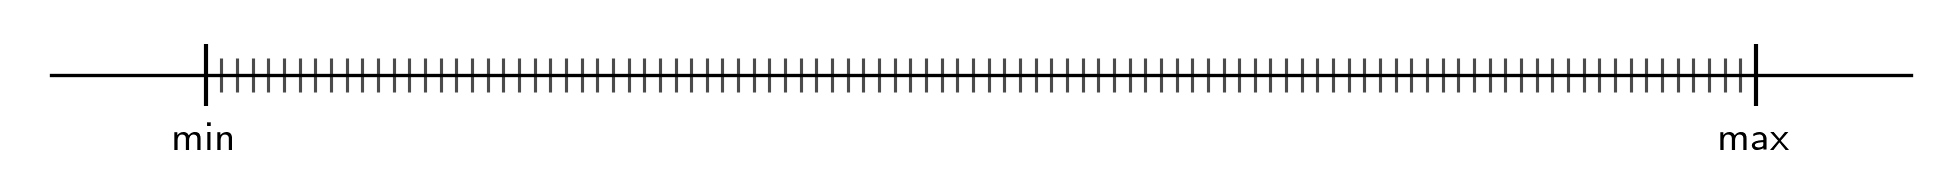

In [119]:
# Uniform

plt.figure(figsize=(8, 0.2))

plt.tight_layout()
ax = plt.subplot(1, 1, 1)
setup(ax)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks([0, 1], ["min", "max"])
# plt.xticks(np.linspace(-1, 1, 20), [""]*20, minor=True)
ax.set_xticks(np.linspace(0, 1, 100), minor=True)

def post(ax):
    plt.xlim(-0.1, 1.1)

    ax.tick_params(axis='x', which='major', direction='inout', length=15)
    ax.tick_params(axis='x', which='minor', direction='inout', length=8, color=(0, 0, 0, 0.7))
    
post(ax)

plt.savefig('../../output/searchable_ranges_plots/uniform.pdf', bbox_inches='tight')

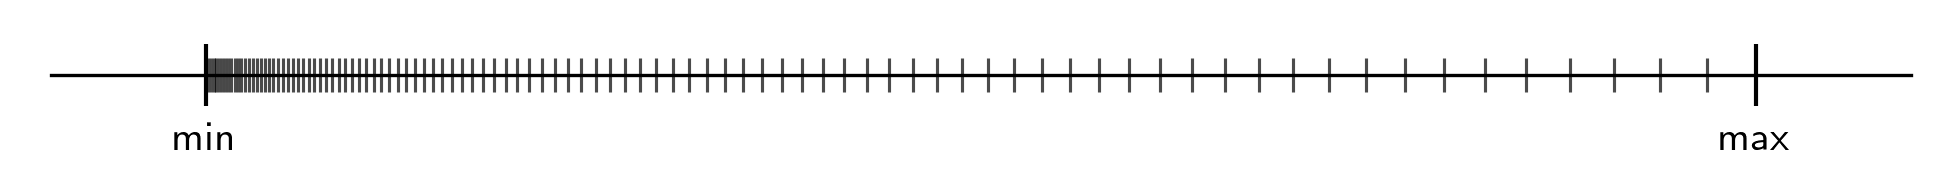

In [120]:
# LogUniform

plt.figure(figsize=(8, 0.2))
plt.tight_layout()
ax = plt.subplot(1, 1, 1)
setup(ax)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks([0, 1], ["min", "max"])
# plt.xticks(np.linspace(-1, 1, 20), [""]*20, minor=True)

logspace = np.exp(np.linspace(1, 4, 100))
logspace -= logspace.min()
logspace /= logspace.max()

ax.set_xticks(logspace, minor=True)

post(ax)

plt.savefig('../../output/searchable_ranges_plots/loguniform.pdf', bbox_inches='tight')

[      -inf 0.01935637 0.08760143 0.13091036 0.16349587 0.19000593
 0.21257352 0.23236369 0.25008584 0.26620557 0.28104574 0.29483991
 0.30776279 0.31994866 0.33150312 0.34251081 0.35304067 0.36314968
 0.37288553 0.38228856 0.39139325 0.40022931 0.40882258 0.41719569
 0.42536857 0.43335894 0.44118257 0.44885366 0.456385   0.46378819
 0.4710738  0.47825152 0.48533023 0.49231818 0.49922297 0.50605172
 0.51281108 0.51950728 0.52614621 0.53273347 0.53927434 0.54577389
 0.552237   0.55866833 0.56507243 0.57145368 0.57781638 0.58416474
 0.59050291 0.59683498 0.60316502 0.60949709 0.61583526 0.62218362
 0.62854632 0.63492757 0.64133167 0.647763   0.65422611 0.66072566
 0.66726653 0.67385379 0.68049272 0.68718892 0.69394828 0.70077703
 0.70768182 0.71466977 0.72174848 0.7289262  0.73621181 0.743615
 0.75114634 0.75881743 0.76664106 0.77463143 0.78280431 0.79117742
 0.79977069 0.80860675 0.81771144 0.82711447 0.83685032 0.84695933
 0.85748919 0.86849688 0.88005134 0.89223721 0.90516009 0.918954

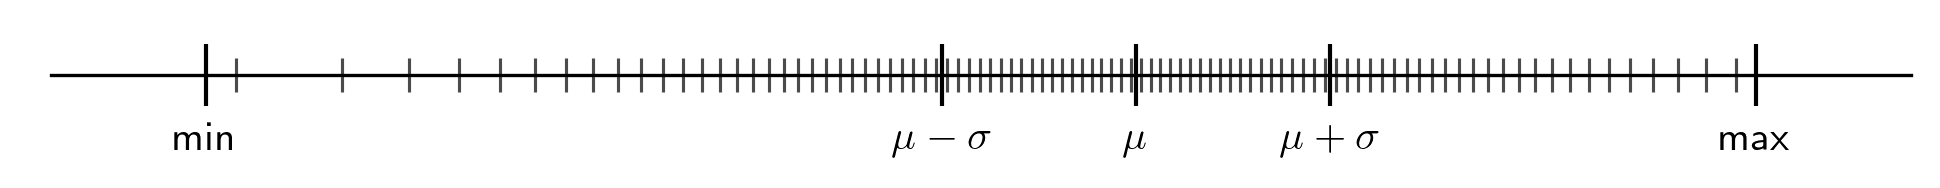

In [121]:
# TruncatedNormal
from scipy.stats import norm

plt.figure(figsize=(8, 0.2))
plt.tight_layout()
ax = plt.subplot(1, 1, 1)
setup(ax)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks([0, 0.375 + 0.1, 0.5 + 0.1, 0.625 + 0.1, 1], ["min", "$\mu - \sigma$", "$\mu$", "$\mu+\sigma$", "max"])
# plt.xticks(np.linspace(-1, 1, 20), [""]*20, minor=True)

invnorm = norm.ppf(np.linspace(0, 1, 100))
invnorm /= 4
invnorm += 0.5 + 0.1
print(invnorm)

ax.set_xticks([x for x in invnorm if x > 0 and x < 1], minor=True)

post(ax)

plt.savefig('../../output/searchable_ranges_plots/normal.pdf', bbox_inches='tight')